In [2]:
from IPython.display import HTML
import numpy as np
import urllib3
import bs4 #this is beautiful soup
import time
import operator
import socket
#import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

# Let's get the movie lense dataset

In [8]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.user', sep='|', names=u_cols)

In [10]:
users.head()
#users data

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
#Ratings data

In [12]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.data', sep='\t', names=r_cols
                )
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
#Movies

In [17]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

movies = pd.read_csv('movie_data.csv', sep='|', header=None)

movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
movies = movies[movies.columns[:5]]

In [21]:
movies.head()

,0,1,2,3,4
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


### Giving them column names

In [23]:
movies.columns = m_cols

In [24]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


In [26]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [28]:
movies.describe()

,movie_id,video_release_date
count,1682.000000,0.0
mean,841.500000,NaN
std,485.695893,NaN
min,1.000000,NaN
25%,421.250000,NaN
50%,841.500000,NaN
75%,1261.750000,NaN
max,1682.000000,NaN


In [29]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [30]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [36]:
column_you_want = ['occupation', 'sex']
users[column_you_want].head()

,occupation,sex
0,technician,M
1,other,F
2,writer,M
3,technician,M
4,other,F


## Filtering data

Users older than 25

In [38]:
oldUsers = users['age'] < 25

In [40]:
print(oldUsers)

0       True
1      False
2       True
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23      True
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916     True
917    False
918    False
919    False
920     True
921    False
922     True
923    False
924     True
925    False
926     True
927     True
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935     True
936    False
937    False
938    False
939    False
940     True
941    False
942     True
Name: age, Length: 943, dtype: bool


In [41]:
oldUsers = users[users['age'] > 25]

In [42]:
oldUsers

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703
10,11,39,F,other,30329
11,12,28,F,other,06405
12,13,47,M,educator,29206


In [50]:
 male_age40 = users[(users['age']==40) & (users['sex']=='M')]

In [51]:
male_age40

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629
289,290,40,M,engineer,93550
308,309,40,M,scientist,70802
357,358,40,M,educator,10022
397,398,40,M,other,60008
564,565,40,M,student,55422


In [53]:
female_prog = users[(users['sex']=='F') & (users['occupation']=='programmer')]

In [54]:
female_prog['age'].mean()

32.166666666666664

In [55]:
female_prog.describe()

,user_id,age
count,6.000000,6.000000
mean,411.166667,32.166667
std,149.987222,5.115336
min,292.000000,26.000000
25%,313.000000,28.250000
50%,378.000000,32.000000
75%,416.750000,36.500000
max,698.000000,38.000000


In [56]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [83]:
grp_userID = ratings.groupby(by='user_id')
grp_userID.mean().head()

,movie_id,rating,unix_timestamp
user_id,,,
1,136.500000,3.610294,8.773916e+08
2,249.500000,3.709677,8.886204e+08
3,318.814815,2.796296,8.892372e+08
4,291.041667,4.333333,8.920028e+08
5,291.291429,2.874286,8.762081e+08


In [64]:
ratings.groupby('user_id').mean()

,movie_id,rating,unix_timestamp
user_id,,,
1,136.500000,3.610294,8.773916e+08
2,249.500000,3.709677,8.886204e+08
3,318.814815,2.796296,8.892372e+08
4,291.041667,4.333333,8.920028e+08
5,291.291429,2.874286,8.762081e+08
6,312.018957,3.635071,8.835756e+08
7,392.779156,3.965261,8.914788e+08
8,301.322034,3.796610,8.793621e+08
9,370.818182,4.272727,8.869596e+08


In [65]:
ratings.groupby('user_id').rating.mean()

user_id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
6      3.635071
7      3.965261
8      3.796610
9      4.272727
10     4.206522
11     3.464088
12     4.392157
13     3.097484
14     4.091837
15     2.875000
16     4.328571
17     3.035714
18     3.880866
19     3.550000
20     3.104167
21     2.670391
22     3.351562
23     3.635762
24     4.323529
25     4.051282
26     2.943925
27     3.240000
28     3.721519
29     3.647059
30     3.767442
         ...   
914    3.086957
915    3.115385
916    3.365931
917    3.542857
918    3.349515
919    3.470046
920    3.230769
921    3.272727
922    3.370079
923    4.148649
924    3.756098
925    3.125000
926    3.300000
927    3.691667
928    4.687500
929    3.693878
930    2.968254
931    3.721311
932    3.966805
933    2.646739
934    3.701149
935    3.923077
936    3.746479
937    3.375000
938    3.268519
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: rating, Le

## Number of movies per user

In [88]:
movies_per_user = ratings['movie_id'].groupby(ratings['user_id']) #see the difference from the previous one
movies_per_user.count().head()

user_id
1    272
2     62
3     54
4     24
5    175
Name: movie_id, dtype: int64

### Average rating per movie

In [66]:
ratings.groupby('movie_id').rating.mean()

movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
6       3.576923
7       3.798469
8       3.995434
9       3.896321
10      3.831461
11      3.847458
12      4.385768
13      3.418478
14      3.967213
15      3.778157
16      3.205128
17      3.119565
18      2.800000
19      3.956522
20      3.416667
21      2.761905
22      4.151515
23      4.120879
24      3.448276
25      3.443686
26      3.452055
27      3.105263
28      3.931159
29      2.666667
30      3.945946
          ...   
1653    5.000000
1654    1.000000
1655    2.000000
1656    3.500000
1657    3.000000
1658    3.000000
1659    1.000000
1660    2.000000
1661    1.000000
1662    2.500000
1663    2.000000
1664    3.250000
1665    2.000000
1666    2.000000
1667    3.000000
1668    3.000000
1669    2.000000
1670    3.000000
1671    1.000000
1672    2.000000
1673    3.000000
1674    4.000000
1675    3.000000
1676    2.000000
1677    3.000000
1678    1.000000
1679    3.000000
1680 

In [93]:
#one more way
ratings['rating'].groupby(ratings['movie_id']).mean().head()

movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

# Movie with highest average rating
### This is the toughest one

In [73]:
df = ratings.groupby('movie_id').rating.mean()

In [95]:
df.sort_values(ascending=False).head()

movie_id
1293    5.0
1467    5.0
1653    5.0
814     5.0
1122    5.0
Name: rating, dtype: float64

In [99]:
df.max()

5.0

In [100]:
max_rating = df.max()

In [103]:
#df which is mean rating is actually a series because it is just a single column
movie_ids_max_rating = df[df == max_rating]

In [106]:
movie_ids_max_rating

movie_id
814     5.0
1122    5.0
1189    5.0
1201    5.0
1293    5.0
1467    5.0
1500    5.0
1536    5.0
1599    5.0
1653    5.0
Name: rating, dtype: float64

In [107]:
movie_ids_max_rating.index

Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name='movie_id')

In [108]:
movies[movies['movie_id'].isin(movie_ids_max_rating.index)].title

813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object

# Data analysis of movie lense data set
##### http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/

In [114]:
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [115]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [116]:
movies

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995)
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...


In [112]:
# let's have one merged dataframe
movie_ratings = pd.merge(movies, ratings, how='inner', on='movie_id') #merging is joining two tables

In [113]:
movie_ratings

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324
5,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,5,4,875635748
6,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,109,4,880563619
7,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,181,3,878962392
8,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,95,5,879197329
9,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,268,3,875742341


In [117]:
#now joining the last data set i.e. users
lense = pd.merge(movie_ratings, users)
lense

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,308,4,887739056,60,M,retired,95076


## What are the 25 most rated movies?

In [127]:
most_rated = lense.groupby('title').size() #size() is to get the count of records for each title

In [128]:
type(most_rated)

pandas.core.series.Series

In [129]:
most_rated.sort_values(ascending=False)[:25] #can also use head(25)

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [130]:
#Alternatly
lense['title'].value_counts()

Star Wars (1977)                                             583
Contact (1997)                                               509
Fargo (1996)                                                 508
Return of the Jedi (1983)                                    507
Liar Liar (1997)                                             485
English Patient, The (1996)                                  481
Scream (1996)                                                478
Toy Story (1995)                                             452
Air Force One (1997)                                         431
Independence Day (ID4) (1996)                                429
Raiders of the Lost Ark (1981)                               420
Godfather, The (1972)                                        413
Pulp Fiction (1994)                                          394
Twelve Monkeys (1995)                                        392
Silence of the Lambs, The (1991)                             390
Jerry Maguire (1996)     

## What movies are most highly rated?

In [133]:
lense.groupby("title").rating.mean().head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [134]:
movie_stats = lense.groupby('title').agg({'rating':[np.size, np.mean]})

In [135]:
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [139]:
type(movie_stats)
#column rating is now multi index

pandas.core.frame.DataFrame

In [140]:
movie_stats.sort_values([('rating', 'mean')], ascending=False) #passed a tuple to mention how to sort

rating          
                                                     size      mean
title                                                              
They Made Me a Criminal (1939)                          1  5.000000
Marlene Dietrich: Shadow and Light (1996)               1  5.000000
Saint of Fort Washington, The (1993)                    2  5.000000
Someone Else's America (1995)                           1  5.000000
Star Kid (1997)                                         3  5.000000
Great Day in Harlem, A (1994)                           1  5.000000
Aiqing wansui (1994)                                    1  5.000000
Santa with Muscles (1996)                               2  5.000000
Prefontaine (1997)                                      3  5.000000
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000
Pather Panchali (1955)                                  8  4.625000
Some Mother's Son (1996)                                2  4.500000
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000
Anna (1996)                                             2  4.500000
Everest (1998)                                          2  4.500000
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Bitter Sugar (Azucar Amargo) (1996)                     3  4.333333
Letter From Death Row, A (1998)                         3  4.333333
Third Man, The (1949)                                  72  4.333333
Citizen Kane (1941)                                   198  4.292929
Some Folks Call It a Sling Blade (1993)                41  4.292683
...                                                   ...       ...
New Age, The (1994)                                     1  1.000000
Good Morning (1971)                                     1  1.000000
Further Gesture, A (1996)                               1  1.000000
Nobody Loves Me (Keiner liebt mich) (1994)              1  1.000000
Lotto Land (1995)                                       1  1.000000
Liebelei (1933)                                         1  1.000000
Girl in the Cadillac (1995)                             1  1.000000
Vie est belle, La (Life is Rosey) (1987)                1  1.000000
Baton Rouge (1988)                                      1  1.000000
Very Natural Thing, A (1974)                            1  1.000000
Bird of Prey (1996)                                     1  1.000000
Office Killer (1997)                                    1  1.000000
Lashou shentan (1992)                                   1  1.000000
August (1996)                                           1  1.000000
Venice/Venice (1992)                                    2  1.000000
Death in the Garden (Mort en ce jardin, La) (1956)      1  1.000000
Careful (1992)                                          1  1.000000
Tigrero: A Film That Was Never Made (1994)              1  1.000000
Butterfly Kiss (1995)                                   1  1.000000
Low Life, The (1994)                                    1  1.000000
To Cross the Rubicon (1991)                             1  1.000000
Modern Affair, A (1995)                                 1  1.000000
Boys in Venice (1996)                                   2  1.000000
Hedd Wyn (1992)                                         1  1.000000
Wend Kuuni (God's Gift) (1982)                          1  1.000000
Eye of Vichy, The (Oeil de Vichy, L') (

In [141]:
movie_stats[movie_stats['rating']['size'] > 50].sort_values([('rating','mean')], ascending=False)

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Third Man, The (1949)                                  72  4.333333
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       367  4.204360
Boot, Das (1981)                                      201  4.203980
Sunset Blvd. (1950)                                    65  4.200000
Sling Blade (1996)                                    136  4.198529
...                                                   ...       ...
Batman Returns (1992)                                 142  2.683099
Batman Forever (1995)                                 114  2.666667
Jaws 2 (1978)                                          66  2.666667
Last Man Standing (1996)                               53  2.660377
Bean (1997)                                            91  2.659341
Kull the Conqueror (1997)                              69  2.637681
Black Sheep (1996)                                     55  2.636364
Tales from the Crypt Presents: Bordello of Bloo...     55  2.636364
Weekend at Bernie's (1989)                             60  2.616667
Spawn (1997)                                          143  2.615385
Robin Hood: Men in Tights (1993)                       56  2.589286
Phantom, The (1996)                                    80  2.575000
Event Horizon (1997)                                  127  2.574803
Sgt. Bilko (1996)                                      74  2.567568
Amityville Horror, The (1979)                          53  2.566038
Crash (1996)                                          128  2.546875
Excess Baggage (1997)                                  52  2.538462
Pocahontas (1995)                                      51  2.529412
Escape from L.A. (1996)                                91  2.461538
Batman & Robin (1997)                                  62  2.451613
Lawnmower Man, The (1992)                              65  2.446154
Jungle2Jungle (1997)                                  132  2.439394
Vegas Vacation (1997)                                  75  2.400000
Very Brady Sequel, A (1996)                            93  2.397849
Star Trek V: The Final Frontier (1989)                 63  2.396825
Cable Guy, The (1996)                  

## Limiting our population going forward

In [142]:
most50 = lense.groupby('title').size().sort_values(ascending=False)

In [143]:
most50

title
Star Wars (1977)                                     583
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [144]:
type(most50)

pandas.core.series.Series

In [145]:
most50 = most50[:50]

In [146]:
most50

title
Star Wars (1977)                                583
Contact (1997)                                  509
Fargo (1996)                                    508
Return of the Jedi (1983)                       507
Liar Liar (1997)                                485
English Patient, The (1996)                     481
Scream (1996)                                   478
Toy Story (1995)                                452
Air Force One (1997)                            431
Independence Day (ID4) (1996)                   429
Raiders of the Lost Ark (1981)                  420
Godfather, The (1972)                           413
Pulp Fiction (1994)                             394
Twelve Monkeys (1995)                           392
Silence of the Lambs, The (1991)                390
Jerry Maguire (1996)                            384
Chasing Amy (1997)                              379
Rock, The (1996)                                378
Empire Strikes Back, The (1980)                 367
Star T

### Most controversial movies amongst different ages

Text(0,0.5,'Number of users')

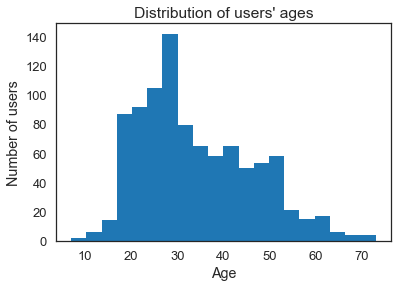

In [150]:
#let's take look at distribution of age
users.age.plot.hist(bins=20)
plt.title("Distribution of users' ages")
plt.xlabel("Age")
plt.ylabel("Number of users")

### Binning users into different age groups

In [158]:
print(users.age.max(), users['age'].min())

73 7


In [160]:
labels_for_bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lense['age_group'] = pd.cut(lense['age'], range(0, 81, 10), labels=labels_for_bins, right=False)

In [168]:
lense[['age', 'age_group']].drop_duplicates().head(20)

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [171]:
lense.groupby("age_group").size()

age_group
0-9         43
10-19     8181
20-29    39535
30-39    25696
40-49    15021
50-59     8704
60-69     2623
70-79      197
dtype: int64

### Compare ratings across age groups

In [169]:
lense.groupby('age_group').rating.mean()

age_group
0-9      3.767442
10-19    3.486126
20-29    3.467333
30-39    3.554444
40-49    3.591772
50-59    3.635800
60-69    3.648875
70-79    3.649746
Name: rating, dtype: float64

In [170]:
lense.groupby("age_group").agg({"rating":[np.size,np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [186]:
type(most50.index)
most50.index

Index(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)',
       'Raiders of the Lost Ark (1981)', 'Godfather, The (1972)',
       'Pulp Fiction (1994)', 'Twelve Monkeys (1995)',
       'Silence of the Lambs, The (1991)', 'Jerry Maguire (1996)',
       'Chasing Amy (1997)', 'Rock, The (1996)',
       'Empire Strikes Back, The (1980)', 'Star Trek: First Contact (1996)',
       'Back to the Future (1985)', 'Titanic (1997)',
       'Mission: Impossible (1996)', 'Fugitive, The (1993)',
       'Indiana Jones and the Last Crusade (1989)',
       'Willy Wonka and the Chocolate Factory (1971)',
       'Princess Bride, The (1987)', 'Forrest Gump (1994)',
       'Monty Python and the Holy Grail (1974)', 'Saint, The (1997)',
       'Full Monty, The (1997)', 'Men in Black (1997)',
       'Terminator, Th

In [174]:
lense.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998,
            99999],
           dtype='int64', length=100000)

In [180]:
lense.set_index('title', inplace=True)

In [181]:
lense.head()

,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
title,,,,,,,,,,,
Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [182]:
by_age = lense.loc[most50.index].groupby(['title','age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

In [187]:
by_age.head(10)

,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
title,,,,,,,,,,,
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,308,5,887737431,60,M,retired,95076,60-69
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,287,5,875334271,21,M,salesman,31211,20-29
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,148,5,877016805,33,M,engineer,97006,30-39
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,280,3,891701027,30,F,librarian,22903,30-39
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,66,5,883601236,23,M,student,80521,20-29
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,5,4,875635758,33,F,other,15213,30-39
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,109,5,880563331,29,M,other,55423,20-29
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,95,5,879197329,31,M,administrator,10707,30-39
Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,268,5,875309719,24,M,engineer,19422,20-29


In [192]:
by_age.rating.mean().unstack(1).fillna(0)

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Back to the Future (1985),0.0,4.037037,3.720588,3.915789,4.036364,3.500000,3.857143,4.000000
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.000000
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.000000
Chasing Amy (1997),0.0,4.257143,3.829787,3.710526,3.914894,3.846154,2.857143,0.000000
Conspiracy Theory (1997),0.0,3.565217,3.382114,3.419355,3.465116,3.538462,2.600000,0.000000
Contact (1997),5.0,3.693878,3.785714,3.847458,3.866667,3.739130,3.777778,0.000000


## Movies men and women most disagree on

In [193]:
lense.head()

,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
title,,,,,,,,,,,
Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


### We'll use pivot_table to pivot the table and aggregate the data

In [205]:
pivoted = lense.pivot_table(index=['title'],
                 columns=['sex'],
                 values='rating',
                 fill_value=0)

In [206]:
pivoted.head()

sex,F,M
title,,
'Til There Was You (1997),2.200000,2.500000
1-900 (1994),1.000000,3.000000
101 Dalmatians (1996),3.116279,2.772727
12 Angry Men (1957),4.269231,4.363636
187 (1997),3.500000,2.870968


In [207]:
pivoted['diff_in_ratings'] = pivoted['F'] - pivoted['M']

In [208]:
pivoted.head()

sex,F,M,diff_in_ratings
title,,,
'Til There Was You (1997),2.200000,2.500000,-0.300000
1-900 (1994),1.000000,3.000000,-2.000000
101 Dalmatians (1996),3.116279,2.772727,0.343552
12 Angry Men (1957),4.269231,4.363636,-0.094406
187 (1997),3.500000,2.870968,0.629032


In [216]:
#For the most rated 50 movies
disagreements = pivoted[pivoted.index.isin(most50.index)]['diff_in_ratings']

Text(0.5,0,'Difference in Average Rating')

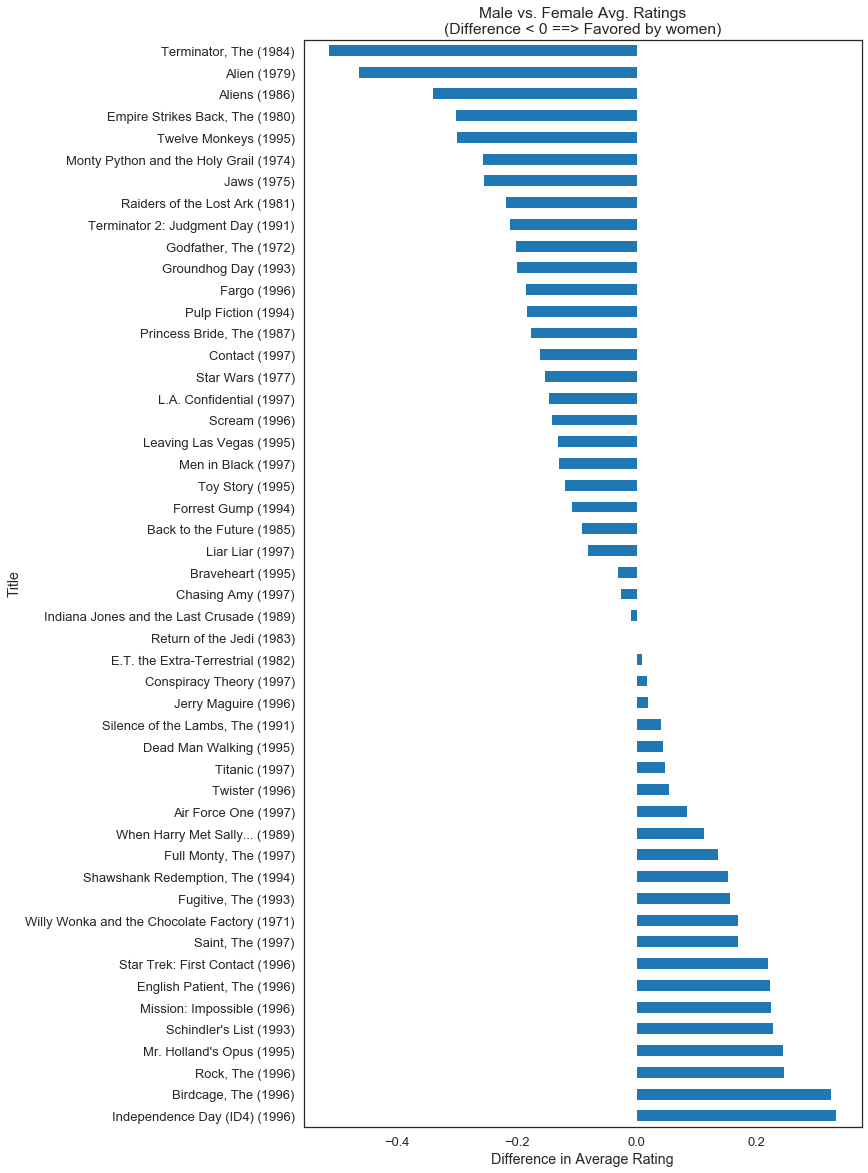

In [226]:
disagreements.sort_values(ascending=False).plot(kind='barh', figsize=[10, 20])
plt.title('Male vs. Female Avg. Ratings\n(Difference < 0 ==> Favored by women)')
plt.ylabel('Title')
plt.xlabel('Difference in Average Rating')

In [213]:
pivoted.index

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='title', length=1664)